<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"><li><span><a href="#Goal" data-toc-modified-id="Goal-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Goal</a></span></li><li><span><a href="#Var" data-toc-modified-id="Var-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Var</a></span></li><li><span><a href="#Init" data-toc-modified-id="Init-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Init</a></span></li><li><span><a href="#Load" data-toc-modified-id="Load-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Load</a></span></li><li><span><a href="#Alpha-div" data-toc-modified-id="Alpha-div-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Alpha div</a></span><ul class="toc-item"><li><span><a href="#non-phylo-methods" data-toc-modified-id="non-phylo-methods-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>non-phylo methods</a></span></li><li><span><a href="#phylo-methods" data-toc-modified-id="phylo-methods-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>phylo methods</a></span></li><li><span><a href="#Writing" data-toc-modified-id="Writing-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Writing</a></span></li><li><span><a href="#Summarizing" data-toc-modified-id="Summarizing-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Summarizing</a></span></li><li><span><a href="#Format-for-iTOL" data-toc-modified-id="Format-for-iTOL-5.5"><span class="toc-item-num">5.5&nbsp;&nbsp;</span>Format for iTOL</a></span><ul class="toc-item"><li><span><a href="#SpecD" data-toc-modified-id="SpecD-5.5.1"><span class="toc-item-num">5.5.1&nbsp;&nbsp;</span>SpecD</a></span></li></ul></li></ul></li><li><span><a href="#Beta-diversity" data-toc-modified-id="Beta-diversity-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Beta-diversity</a></span></li><li><span><a href="#--debug--" data-toc-modified-id="--debug---7"><span class="toc-item-num">7&nbsp;&nbsp;</span>--debug--</a></span><ul class="toc-item"><li><span><a href="#Writing" data-toc-modified-id="Writing-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Writing</a></span></li></ul></li><li><span><a href="#sessionInfo" data-toc-modified-id="sessionInfo-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>sessionInfo</a></span></li></ul></div>

# Goal

* calculate alpha and beta diversity metrics using `phyloseq` and associated R packages

# Var

In [1]:
work_dir = '/ebio/abt3_projects/Georg_animal_feces/data/16S/LLA/diversity/'

# phyloseq 
physeq_file = '/ebio/abt3_projects/Georg_animal_feces/data/16S/LLA/phyloseq/physeq_r5k.RDS'

# threads to use
threads = 12

# Init

In [2]:
library(dplyr)
library(tidyr)
library(ggplot2)
library(phyloseq)
library(picante)
library(vegan)
source('/ebio/abt3_projects/Georg_animal_feces/code/init.R') 
source('/ebio/abt3_projects/Georg_animal_feces/code/itol.R') 


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

Loading required package: ape
Loading required package: vegan
Loading required package: permute
Loading required package: lattice
This is vegan 2.4-3
Loading required package: nlme

Attaching package: ‘nlme’

The following object is masked from ‘package:dplyr’:

    collapse



In [3]:
make_dir(work_dir)

Directory already exists: /ebio/abt3_projects/Georg_animal_feces/data/16S/LLA/diversity/ 


# Load

In [4]:
# phyloseq obj.
physeq = readRDS(physeq_file)
physeq

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 30290 taxa and 213 samples ]
sample_data() Sample Data:       [ 213 samples by 171 sample variables ]
tax_table()   Taxonomy Table:    [ 30290 taxa by 7 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 30290 tips and 29752 internal nodes ]

In [5]:
# metadata
metadata = physeq %>%
    sample_data %>%
    as.matrix %>%
    as.data.frame %>%
    mutate(Sample_ID = rownames(.)) %>%
    dplyr::select(Sample_ID, class, order, family, genus, scientific_name, 
                  diet, habitat, habitat_detail, captive_wild, sample_type)

metadata %>% status

Warning message in class(X) <- NULL:
“Setting class(x) to NULL;   result will no longer be an S4 object”

[1] 213  11


Sample_ID,class,order,family,genus,scientific_name,diet,habitat,habitat_detail,captive_wild,sample_type
X1.Eurasian.Beaver,Mammalia,Rodentia,Castoridae,Castor,Castor_fiber,herbivore,terrestrial habitat,terrestrial habitat,wild,feces
X101.Horse,Mammalia,Perissodactyla,Equidae,Equus,Equus_caballus,herbivore,terrestrial habitat,grassland,captive,feces
X102.Kulan,Mammalia,Perissodactyla,Equidae,Equus,Equus_hemionus,herbivore,terrestrial habitat,grassland,wild,feces


# Alpha div

## non-phylo methods

In [6]:
# calculating with phyloseq
alpha_div = estimate_richness(physeq)
alpha_div %>% status

[1] 213   9


,Observed,Chao1,se.chao1,ACE,se.ACE,Shannon,Simpson,InvSimpson,Fisher
X1.Eurasian.Beaver,158,176.750,9.896764,171.1772,6.056789,3.294359,0.9107438,11.20370,31.05593
X101.Horse,933,1138.169,32.673961,1146.1027,15.467074,6.183396,0.9958891,243.25692,338.14735
X102.Kulan,422,450.500,9.963181,449.1472,9.583702,5.103995,0.9831976,59.51531,109.91883


## phylo methods

In [7]:
# microbe tree
microbe_tree = physeq %>% phy_tree
microbe_tree


Phylogenetic tree with 30290 tips and 29752 internal nodes.

Tip labels:
	ea2df9bcd7f6a10e0fa509d237d19c6d, 130b094f31455943fb20899a36af8afd, b9b9562a0f34ad60c552f7f46d7a4b3b, 289f16b7043438e2880de25012fd0ba4, f7dfb53e3c495fba143f3b5ad9dc4b9c, f3a837ee0c15eabf5636069769c0d9f2, ...
Node labels:
	root, 0.947, 0.636, 0.962, 0.829, 0.962, ...

Rooted; includes branch lengths.

In [8]:
# picante "comm" obj
otu = physeq %>%
    otu_table %>%
    as.matrix %>% t %>% 
    as.data.frame

otu %>% dim
otu[1:5,1:5] %>% print

[1]   213 30290

                   ea2df9bcd7f6a10e0fa509d237d19c6d
X1.Eurasian.Beaver                                0
X101.Horse                                        2
X102.Kulan                                        0
X109.Red.Fox                                      0
X110.Noctule                                      0
                   130b094f31455943fb20899a36af8afd
X1.Eurasian.Beaver                                0
X101.Horse                                        0
X102.Kulan                                        0
X109.Red.Fox                                      0
X110.Noctule                                      0
                   b9b9562a0f34ad60c552f7f46d7a4b3b
X1.Eurasian.Beaver                                0
X101.Horse                                        0
X102.Kulan                                        0
X109.Red.Fox                                      0
X110.Noctule                                      0
                   289f16b7043438e2880de25012fd0ba4
X1.Eurasian.

In [9]:
# ordering by tree
otu = otu[,microbe_tree$tip.label]
otu %>% dim
otu[1:5,1:5] %>% print

[1]   213 30290

                   ea2df9bcd7f6a10e0fa509d237d19c6d
X1.Eurasian.Beaver                                0
X101.Horse                                        2
X102.Kulan                                        0
X109.Red.Fox                                      0
X110.Noctule                                      0
                   130b094f31455943fb20899a36af8afd
X1.Eurasian.Beaver                                0
X101.Horse                                        0
X102.Kulan                                        0
X109.Red.Fox                                      0
X110.Noctule                                      0
                   b9b9562a0f34ad60c552f7f46d7a4b3b
X1.Eurasian.Beaver                                0
X101.Horse                                        0
X102.Kulan                                        0
X109.Red.Fox                                      0
X110.Noctule                                      0
                   289f16b7043438e2880de25012fd0ba4
X1.Eurasian.

In [10]:
# Faith's PD
# ## TODO: use PhyloMeasures for much faster calculation
# pd_div = picante::pd(otu, microbe_tree)
# pd_div %>% status

In [11]:
# adding to full alpha-div table
# alpha_div = cbind(alpha_div, pd_div[rownames(alpha_div),])
# alpha_div %>% status

## Writing

In [12]:
out_file = file.path(work_dir, 'alpha_div_phyloseq.RDS')
saveRDS(alpha_div, out_file)
cat('File writen:', out_file, '\n')

File writen: /ebio/abt3_projects/Georg_animal_feces/data/16S/LLA/diversity//alpha_div_phyloseq.RDS 


## Summarizing

In [13]:
# formatting
alpha_div_f = alpha_div %>%
    mutate(Sample_ID = rownames(.)) %>%
    gather(Index, Index_value, - Sample_ID) %>%
    inner_join(metadata, c('Sample_ID')) 

alpha_div_f %>% status

[1] 1917   13


Sample_ID,Index,Index_value,class,order,family,genus,scientific_name,diet,habitat,habitat_detail,captive_wild,sample_type
X1.Eurasian.Beaver,Observed,158,Mammalia,Rodentia,Castoridae,Castor,Castor_fiber,herbivore,terrestrial habitat,terrestrial habitat,wild,feces
X101.Horse,Observed,933,Mammalia,Perissodactyla,Equidae,Equus,Equus_caballus,herbivore,terrestrial habitat,grassland,captive,feces
X102.Kulan,Observed,422,Mammalia,Perissodactyla,Equidae,Equus,Equus_hemionus,herbivore,terrestrial habitat,grassland,wild,feces


Warning message:
“Removed 2 rows containing non-finite values (stat_boxplot).”

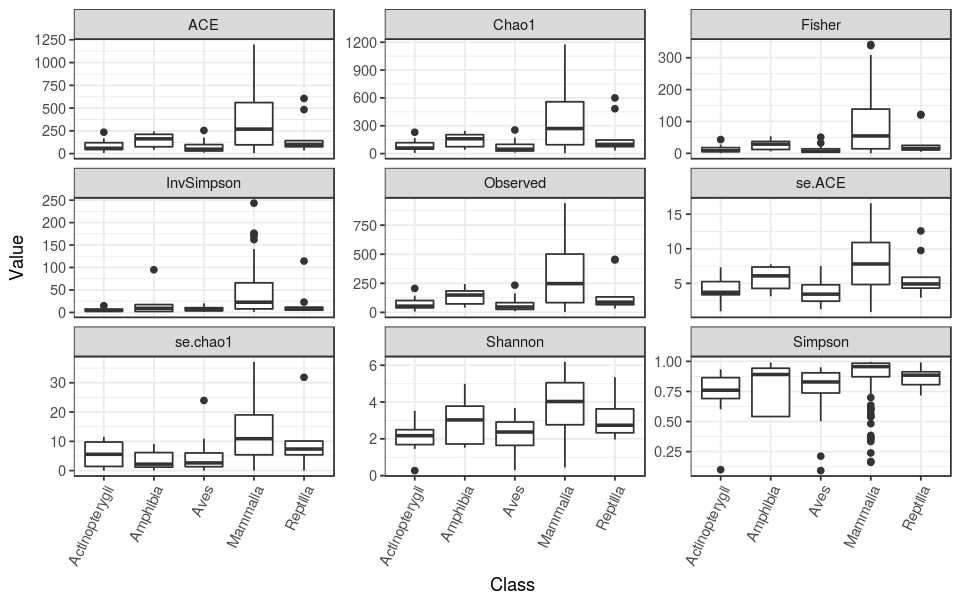

In [14]:
# plotting by metric & host class
p = ggplot(alpha_div_f , aes(class, Index_value)) +
    geom_boxplot() +
    labs(x='Class', y='Value') +
    facet_wrap(~ Index, scales='free_y') +
    theme_bw() +
    theme(
        axis.text.x = element_text(angle=65, hjust=1)
    )

options(repr.plot.width=8, repr.plot.height=5)
plot(p)

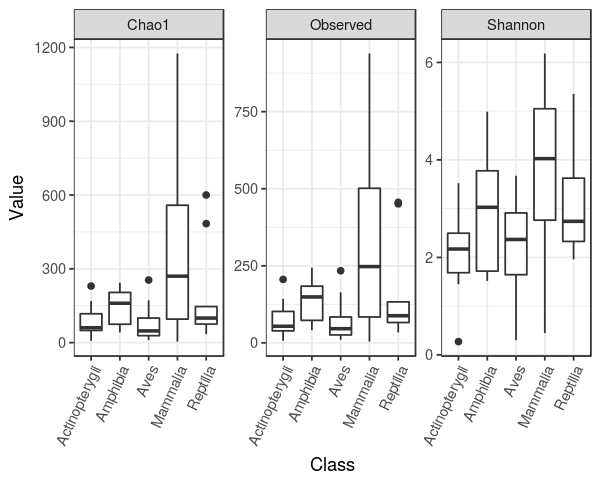

In [15]:
# plotting by metric & host class
to_keep = c('Observed', 'Chao1', 'Shannon', 'PD')

p = ggplot(alpha_div_f %>% filter(Index %in% to_keep), 
           aes(class, Index_value)) +
    geom_boxplot() +
    labs(x='Class', y='Value') +
    facet_wrap(~ Index, scales='free_y') +
    theme_bw() +
    theme(
        axis.text.x = element_text(angle=65, hjust=1)
    )

options(repr.plot.width=5, repr.plot.height=4)
plot(p)

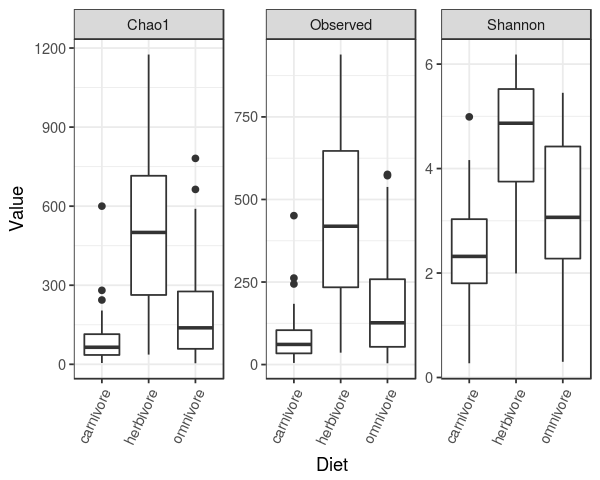

In [16]:
# plotting by metric & host diet
p = ggplot(alpha_div_f %>% filter(Index %in% to_keep), 
           aes(diet, Index_value)) +
    geom_boxplot() +
    labs(x='Diet', y='Value') +
    facet_wrap(~ Index, scales='free_y') +
    theme_bw() +
    theme(
        axis.text.x = element_text(angle=65, hjust=1)
    )

options(repr.plot.width=5, repr.plot.height=4)
plot(p)

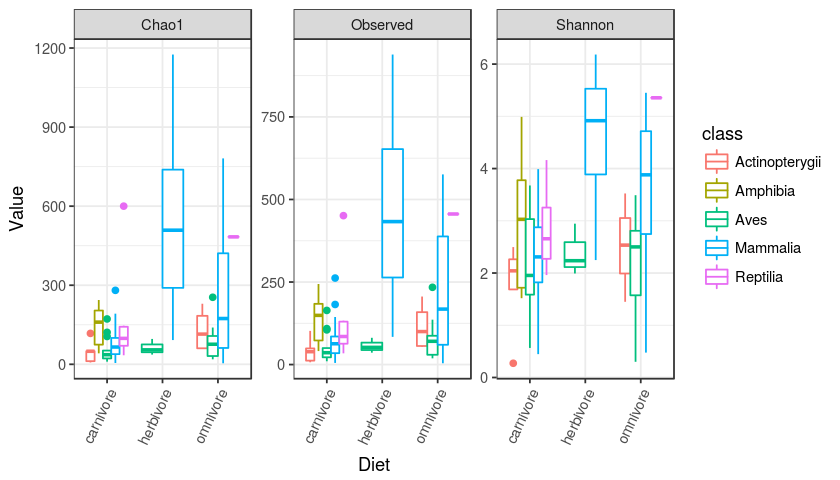

In [17]:
# plotting by metric & host class * diet
p = ggplot(alpha_div_f %>% filter(Index %in% to_keep), 
           aes(diet, Index_value, color=class)) +
    geom_boxplot() +
    labs(x='Diet', y='Value') +
    facet_wrap(~ Index, scales='free_y') +
    theme_bw() +
    theme(
        axis.text.x = element_text(angle=65, hjust=1)
    )

options(repr.plot.width=7, repr.plot.height=4)
plot(p)

## Format for iTOL

For plotting on host phylogeny

### SpecD

Summarizing by species

In [18]:
# shannon index
alpha_div_f_s = alpha_div_f %>% 
    filter(Index == 'Shannon') %>%
    group_by(scientific_name) %>%
    summarize(
        minimum = min(Index_value, na.rm=TRUE),
        q1 = quantile(Index_value, 0.25, na.rm=TRUE),
        median = median(Index_value, na.rm=TRUE),
        q3 = quantile(Index_value, 0.75, na.rm=TRUE),
        maximum = max(Index_value, na.rm=TRUE)
    ) %>%
    ungroup()

F = file.path(work_dir, 'SpecD_itol-boxplot_shannon_phyloseq.txt')
itol_boxplot(alpha_div_f_s, 'Shannon', F)

File written: /ebio/abt3_projects/Georg_animal_feces/data/16S/LLA/diversity//SpecD_itol-boxplot_shannon_phyloseq.txt 


In [19]:
# shannon index
alpha_div_f_s = alpha_div_f %>% 
    filter(Index == 'PD') %>%
    group_by(scientific_name) %>%
    summarize(
        minimum = min(Index_value, na.rm=TRUE),
        q1 = quantile(Index_value, 0.25, na.rm=TRUE),
        median = median(Index_value, na.rm=TRUE),
        q3 = quantile(Index_value, 0.75, na.rm=TRUE),
        maximum = max(Index_value, na.rm=TRUE)
    ) %>%
    ungroup()

F = file.path(work_dir, 'SpecD_itol-boxplot_faithPD_phyloseq.txt')
itol_boxplot(alpha_div_f_s, 'Faiths_PD', F)

File written: /ebio/abt3_projects/Georg_animal_feces/data/16S/LLA/diversity//SpecD_itol-boxplot_faithPD_phyloseq.txt 


# Beta-diversity

In [20]:
# TSS transform
physeq_tss = transform_sample_counts(physeq, function(x) x / sum(x) )
physeq_tss

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 30290 taxa and 213 samples ]
sample_data() Sample Data:       [ 213 samples by 171 sample variables ]
tax_table()   Taxonomy Table:    [ 30290 taxa by 7 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 30290 tips and 29752 internal nodes ]

In [21]:
# calculating with phyloseq (in parallel)
methods = list(jaccard = 'jaccard', 
               bray = 'bray', 
               unifrac = 'unifrac',
               wunifrac = 'wunifrac')

doParallel::registerDoParallel(threads)
beta_div = plyr::llply(methods, function(x) phyloseq::distance(physeq, method=x), .parallel=TRUE)
beta_div %>% length

[1] 4

In [22]:
# summary
lapply(beta_div, function(x) x %>% as.vector %>% summary)

$jaccard
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.1988  0.9992  1.0000  0.9937  1.0000  1.0000 

$bray
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.1104  0.9984  1.0000  0.9890  1.0000  1.0000 

$unifrac
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.2921  0.9668  0.9954  0.9766  0.9993  1.0000 

$wunifrac
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
0.001494 0.024229 0.029821 0.033421 0.037324 0.197845 


# --debug--

In [ ]:
doParallel::registerDoParallel(threads)
weighted_unif = phyloseq::UniFrac(physeq, weighted=TRUE, normalized=TRUE, parallel=TRUE)

In [ ]:
weighted_unif %>% as.vector %>% summary

In [ ]:
doParallel::registerDoParallel(threads)
weighted_unif = phyloseq::UniFrac(physeq, weighted=TRUE, normalized=FALSE, parallel=TRUE)

In [ ]:
weighted_unif %>% as.vector %>% summary

In [ ]:
doParallel::registerDoParallel(threads)
weighted_unif = phyloseq::UniFrac(physeq_tss, weighted=TRUE, normalized=TRUE, parallel=TRUE)

In [ ]:
weighted_unif %>% as.vector %>% summary

In [ ]:
doParallel::registerDoParallel(threads)
weighted_unif = phyloseq::UniFrac(physeq_tss, weighted=TRUE, normalized=FALSE, parallel=TRUE)

In [ ]:
weighted_unif %>% as.vector %>% summary

## Writing

In [23]:
out_file = file.path(work_dir, 'beta_div_phyloseq.RDS')
saveRDS(beta_div, out_file)
cat('File writen:', out_file, '\n')

File writen: /ebio/abt3_projects/Georg_animal_feces/data/16S/LLA/diversity//beta_div_phyloseq.RDS 


# sessionInfo

In [24]:
sessionInfo()

R version 3.4.1 (2017-06-30)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Ubuntu 16.04.4 LTS

Matrix products: default
BLAS: /ebio/abt3_projects/software/miniconda3/envs/py3_physeq_eco/lib/R/lib/libRblas.so
LAPACK: /ebio/abt3_projects/software/miniconda3/envs/py3_physeq_eco/lib/R/lib/libRlapack.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
 [1] bindrcpp_0.2    picante_1.6-2   nlme_3.1-137    vegan_2.4-3    
 [5] lattice_0.20-35 permute_0.9-4   ape_5.0         phyloseq_1.22.3
 [9] ggplot2_2.2.1   tidyr_0.7.1     dplyr_0.7.4    

loaded via a